## LogisticRegression을 구현할 수 있는 API
* LogisticRegression() API의 Method (함수)
> * fit(X, y) : 학습 데이터를 이용하여 모델의 회귀계수(w)와 편향(b)을 학습
> * predict(X) : 모델에 테스트 데이터를 입력하여 계산된 예측값(y) 반환
> * score(X, y) : 모델에 테스트 데이터를 입력하여 모델의 성능(정확도) 반환

* Attribute(속성)
> * coef_: fit() 메서드를 통해 학습된 모델의 회귀계수(W)
> * intercept_: Bias 값(b)

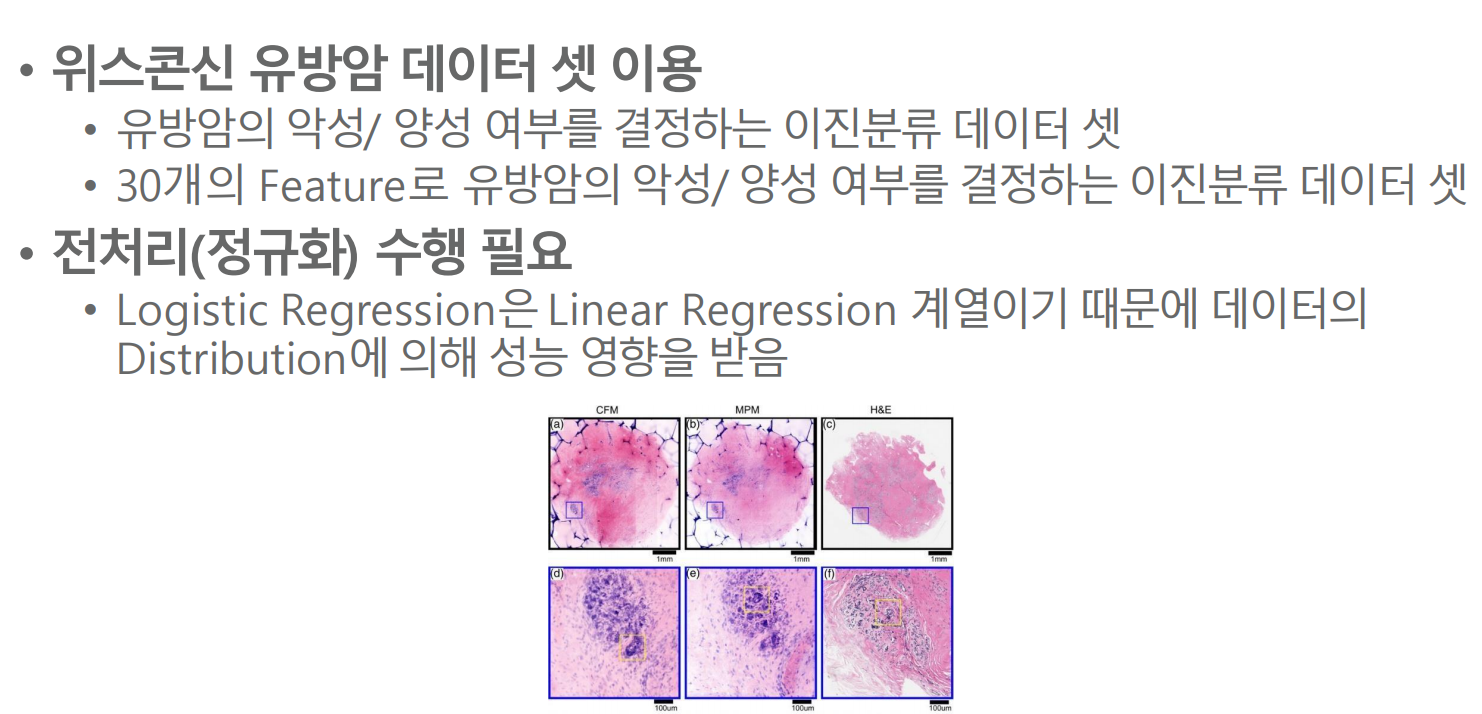

In [1]:
# 위스콘신 유방암 데이터셋 load 및 표준화
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
scaler = StandardScaler()

# 표준화 수행 하여 데이터 변경
data_scaled = scaler.fit_transform(cancer.data)

# 학습데이터와 테스트 데이터로 분할
x_train,x_test, y_train,y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [2]:
# LogisticRegression() API 사용한 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [3]:
# 학습된 모델에 테스트 데이터(x_test) 입력하여 예측값 생성
lr_preds = lr_clf.predict(x_test)

In [4]:
# 예측값(y_pred)과 테스트 데이터의 정답(y_test)을 이용하여 성능 측정
print('Accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))

Accuracy: 0.977


In [5]:
# 학습된 모델의 회귀계수 확인
import numpy as np
import pandas as pd

bias = np.round(lr_clf.intercept_, 11)
weight = np.round(lr_clf.coef_[0], 1)

print('Bias:', bias) 
print('Weight:', weight)

Bias: [0.04258607]
Weight: [-0.3 -0.6 -0.3 -0.4 -0.1  0.4 -0.7 -0.7 -0.4  0.  -1.4  0.1 -0.9 -1.
  0.3  0.9 -0.1 -0.3  0.2  0.9 -0.8 -0.9 -0.7 -0.8 -0.6  0.2 -0.8 -1.1
 -0.5 -0.6]


In [6]:
# 학습된 모델의 회귀계수 확인
coeff = pd.Series(data= weight, index=cancer.feature_names[:30]) 
coeff = coeff.sort_values(ascending=False)
coeff

compactness error          0.9
fractal dimension error    0.9
mean compactness           0.4
smoothness error           0.3
worst compactness          0.2
symmetry error             0.2
texture error              0.1
mean fractal dimension     0.0
mean smoothness           -0.1
concavity error           -0.1
concave points error      -0.3
mean perimeter            -0.3
mean radius               -0.3
mean symmetry             -0.4
mean area                 -0.4
worst symmetry            -0.5
worst smoothness          -0.6
mean texture              -0.6
worst fractal dimension   -0.6
mean concave points       -0.7
mean concavity            -0.7
worst perimeter           -0.7
worst area                -0.8
worst concavity           -0.8
worst radius              -0.8
worst texture             -0.9
perimeter error           -0.9
area error                -1.0
worst concave points      -1.1
radius error              -1.4
dtype: float64